#packages-----------------------------------------------------------------------------------------------------------------

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
import math

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for regression 
import statsmodels.api as sm

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [3]:
#load dataset
df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\Student Study Performances\\study_performance.csv')

#Statistical Summary-----------------------------------------------------------------------------------------------------

In [4]:
#data overview
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#check for duplicates
df.duplicated(subset = 'gender').sum()

np.int64(998)

In [6]:
#check for categorical collumn have appropriate levels
df_cat = df[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]
df_cat.nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

In [7]:
#check categorical value
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

GENDER : ['female' 'male']
RACE_ETHNICITY : ['group B' 'group C' 'group A' 'group D' 'group E']
PARENTAL_LEVEL_OF_EDUCATION : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
LUNCH : ['standard' 'free/reduced']
TEST_PREPARATION_COURSE : ['none' 'completed']


In [8]:
# Displaying the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Displaying the statistical summary of the DataFrame
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[5])\
        .background_gradient(subset=['std'], cmap='Blues')\
        .background_gradient(subset=['75%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
math_score,1000.000000,66.089000,15.163080,0.000000,57.000000,66.000000,77.000000,100.000000
reading_score,1000.000000,69.169000,14.600192,17.000000,59.000000,70.000000,79.000000,100.000000
writing_score,1000.000000,68.054000,15.195657,10.000000,57.750000,69.000000,79.000000,100.000000


Shape of the Dataset

In [11]:
# No of rows and columns
sh = df.shape
print(f'There are {sh[0]} rows and {sh[1]} columns in the dataset.')

There are 1000 rows and 8 columns in the dataset.


In [12]:
#Missing values
# Calculate the percentage of missing values in each column
a = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

# Iterate over each column and its corresponding missing value percentage
for col, percentage in a.items():

    # Print the column name and its missing value percentage with 2 decimal places
    # '<30' in the f-string format specifies left alignment with a field width of 30 characters for the column names.
    print(f'{col:<30} {percentage:.2f}%')

gender                         0.00%
race_ethnicity                 0.00%
parental_level_of_education    0.00%
lunch                          0.00%
test_preparation_course        0.00%
math_score                     0.00%
reading_score                  0.00%
writing_score                  0.00%


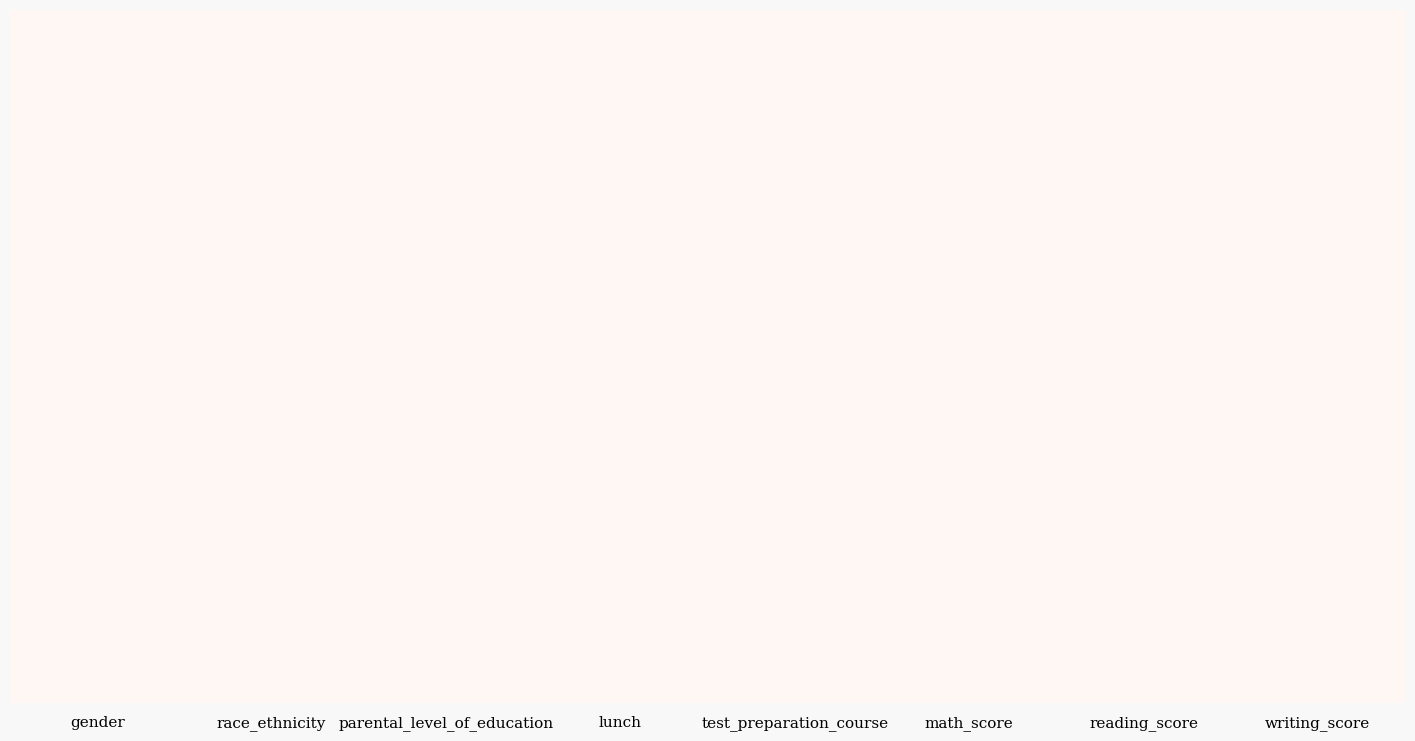

In [13]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [14]:
#No of Catagorical and Numerical Columns:

# Initialize counters for categorical and numerical columns
objectt = 0
integers = 0

# Iterate over each column in the DataFrame
for i in df.columns:
    # Check if the column dtype is 'object', indicating a categorical column
    if df[i].dtype == 'object':
        # Increment the categorical column counter
        objectt += 1
    # Check if the column dtype is 'int64', indicating a numerical column
    elif df[i].dtype == 'int64':
        # Increment the numerical column counter
        integers += 1

# Print the total count of categorical and numerical columns in the dataset
print(f'There are {objectt} categorical and {integers} numerical columns in the dataset')

There are 5 categorical and 3 numerical columns in the dataset


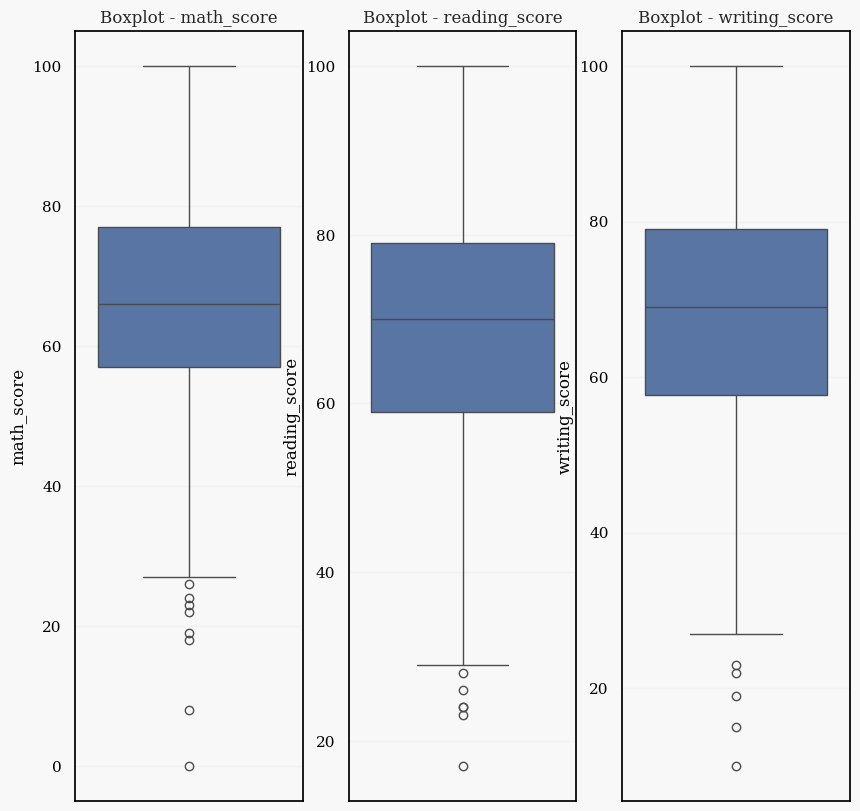

In [15]:
n1 = 'math_score'
n2 = 'reading_score'
n3 = 'writing_score'

#fig, (ax1, ax2) = plt.subplots(1,2)

plt.figure(figsize = (10,10))

#Box plot
plt.subplot(1, 3, 1)
sns.boxplot(y = n1, data=df)
plt.title(f'Boxplot - {n1}')

plt.subplot(1, 3, 2)
sns.boxplot(y = n2, data=df)
plt.title(f'Boxplot - {n2}')

plt.subplot(1, 3, 3)
sns.boxplot(y = n3, data=df)
plt.title(f'Boxplot - {n3}')

#adjust layout
#plt.tight_layout()

#Show the plots
plt.show()

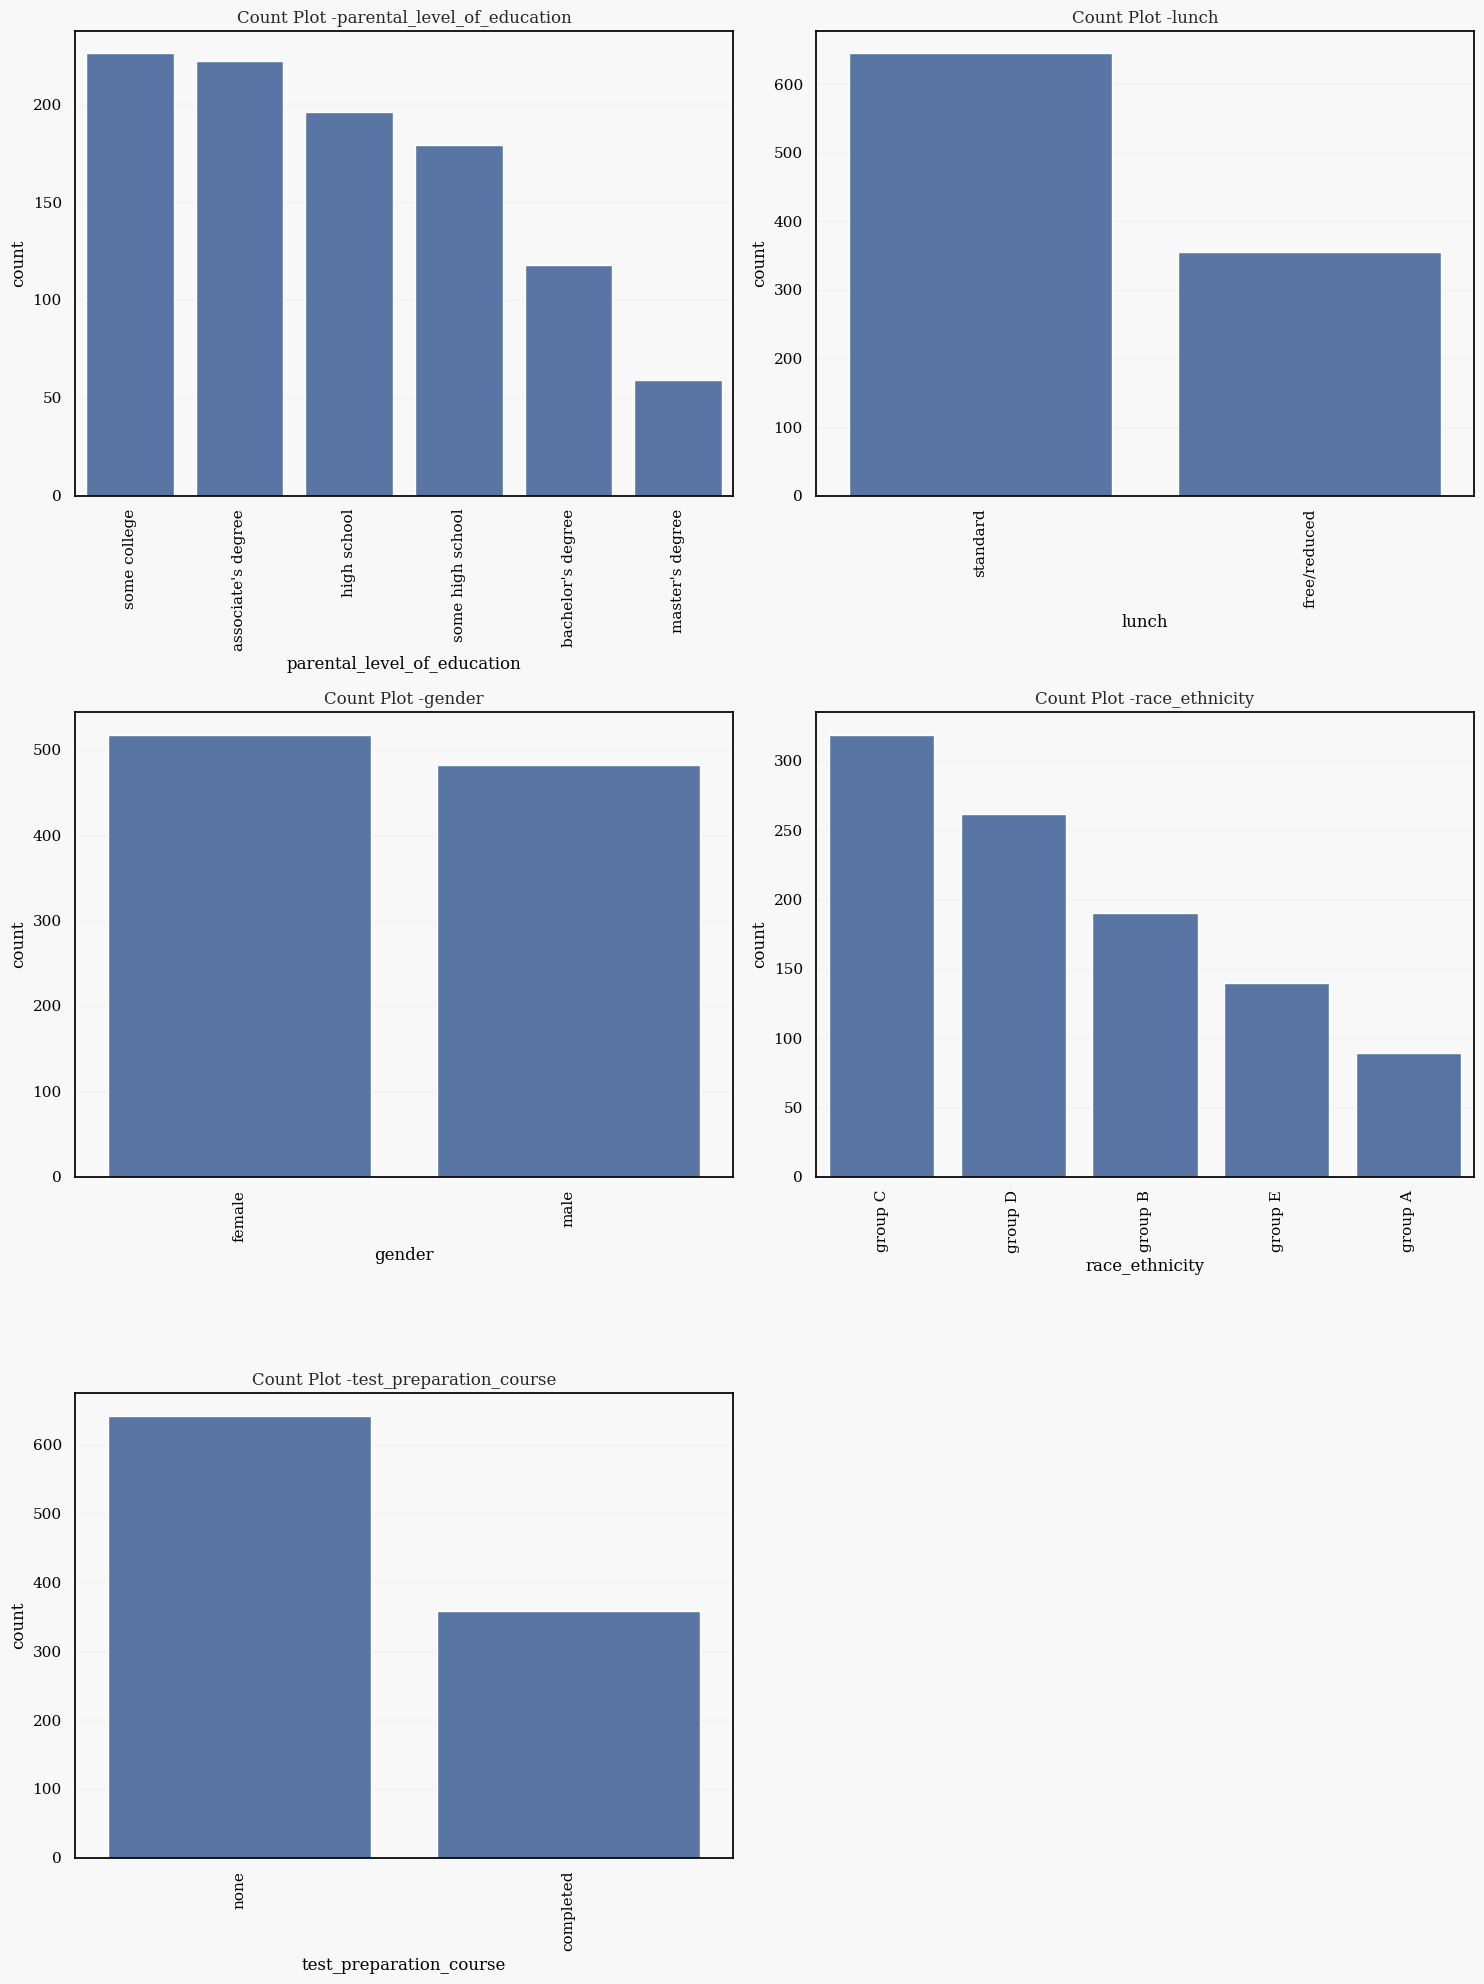

In [16]:
v1 = 'parental_level_of_education'
v2 = 'lunch'
v3 = 'gender'
v4 = 'race_ethnicity'
v5 = 'test_preparation_course'

#fig, (ax1, ax2) = plt.subplots(1,2)

plt.figure(figsize = (15,20))

#Box plot
plt.subplot(3, 2, 1)
sns.countplot(x=v1, data=df_cat,order = df_cat[v1].value_counts().index)
plt.title(f'Count Plot -{v1}')
plt.xticks(rotation = 90)

plt.subplot(3, 2, 2)
sns.countplot(x=v2, data=df_cat,order = df_cat[v2].value_counts().index)
plt.title(f'Count Plot -{v2}')
plt.xticks(rotation = 90)

plt.subplot(3, 2, 3)
sns.countplot(x=v3, data=df_cat,order = df_cat[v3].value_counts().index)
plt.title(f'Count Plot -{v3}')
plt.xticks(rotation = 90)

plt.subplot(3,2,4)
sns.countplot(x=v4, data=df_cat,order = df_cat[v4].value_counts().index)
plt.title(f'Count Plot -{v4}')
plt.xticks(rotation = 90)

plt.subplot(3,2,5)
sns.countplot(x=v5, data=df_cat,order = df_cat[v5].value_counts().index)
plt.title(f'Count Plot -{v5}')
plt.xticks(rotation = 90)

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

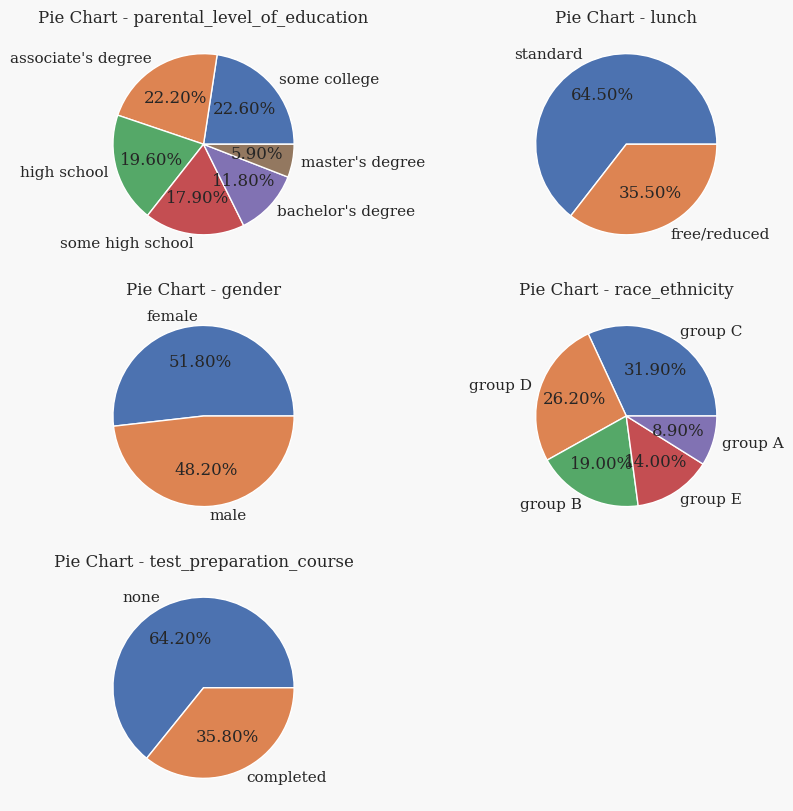

In [17]:
v1 = 'parental_level_of_education'
v2 = 'lunch'
v3 = 'gender'
v4 = 'race_ethnicity'
v5 = 'test_preparation_course'

#fig, (ax1, ax2) = plt.subplots(1,2)

plt.figure(figsize = (10,10))

#Box plot
plt.subplot(3, 2, 1)
counts = df_cat[v1].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v1}')

plt.subplot(3, 2, 2)
counts = df_cat[v2].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v2}')

plt.subplot(3, 2, 3)
counts = df_cat[v3].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v3}')

plt.subplot(3,2,4)
counts = df_cat[v4].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v4}')

plt.subplot(3,2,5)
counts = df_cat[v5].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {v5}')

#adjust layout
#plt.tight_layout()

#Show the plots
plt.show()

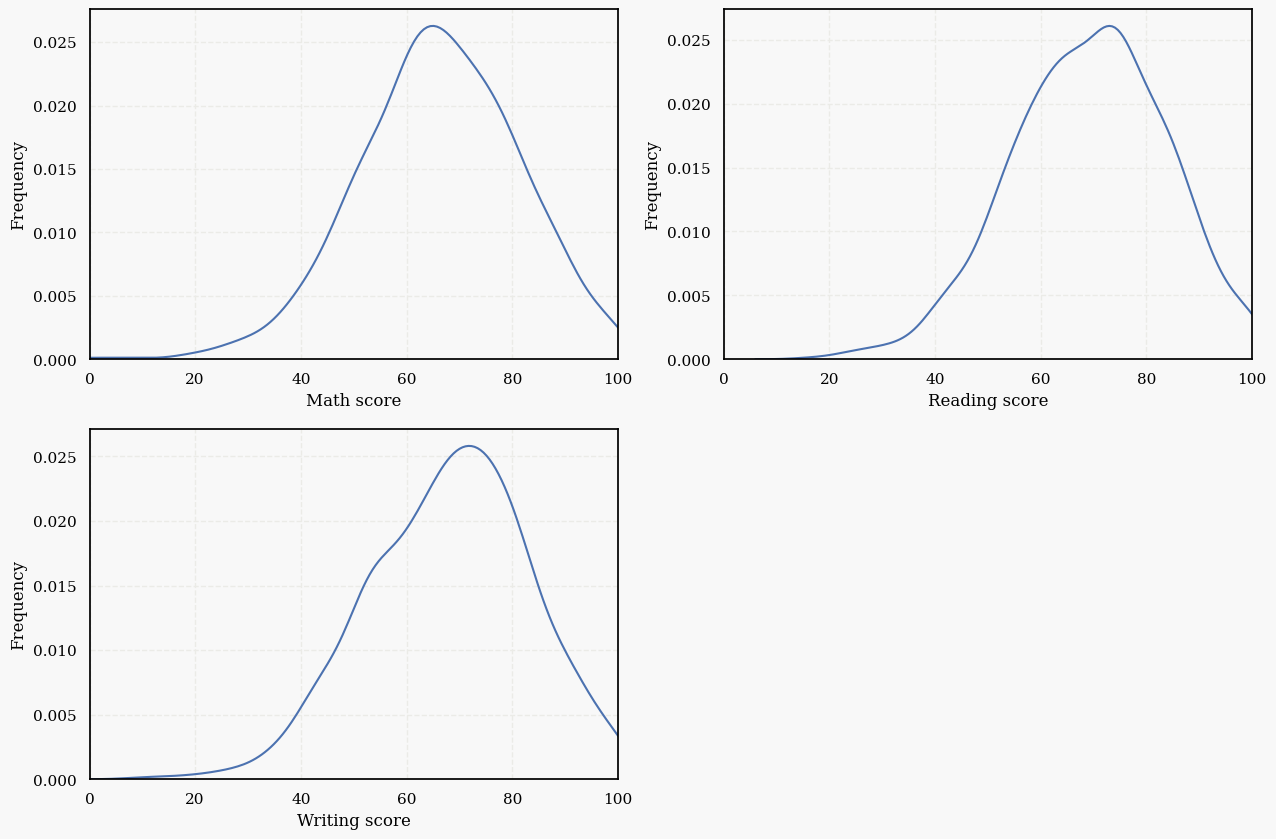

In [18]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
sns.kdeplot(data = df['math_score'])
plt.xlim([0,100])  
plt.xlabel("Math score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=1, linestyle="--")     

plt.subplot(2, 2, 2)
sns.kdeplot(data = df['reading_score'])
plt.xlim([0,100])  
plt.xlabel("Reading score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=1, linestyle="--")     

plt.subplot(2, 2, 3)
sns.kdeplot(data = df['writing_score'])
plt.xlim([0,100])  
plt.xlabel("Writing score", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=1, linestyle="--")     
plt.show()

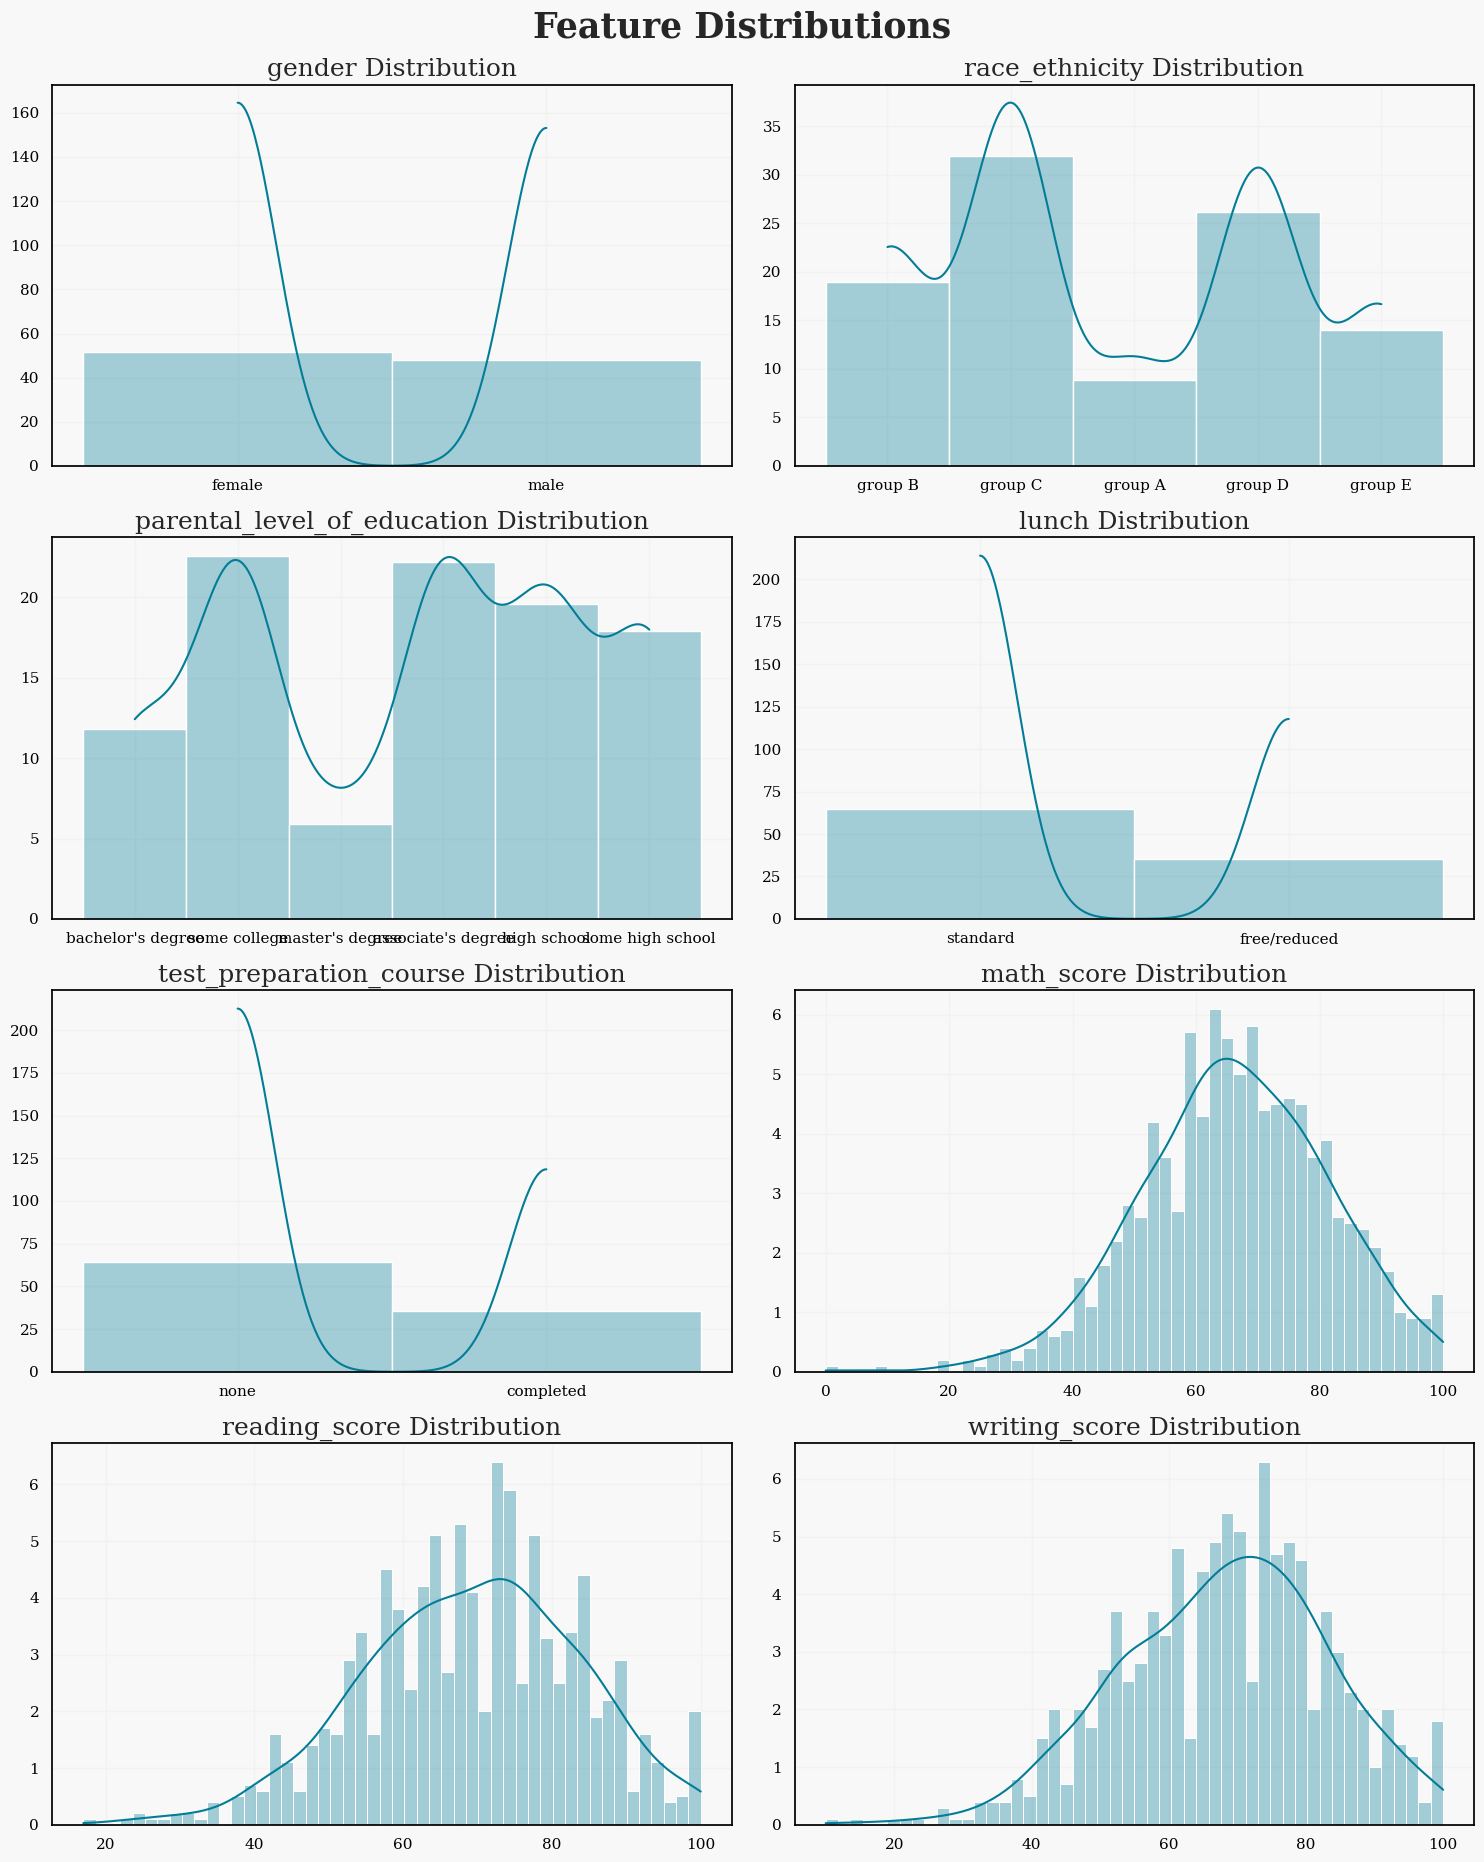

In [19]:
features = [f for f in df.columns if f != 'Sex']
n_bins = 50
histplot_hyperparams = {
    'kde': True,
    'alpha': 0.35,
    'stat': 'percent',
    'bins': n_bins
}

columns = features
n_cols = 2
n_rows = math.ceil(len(columns) / n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 20))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]

    sns.histplot(
        df[column], label='Original',
        ax=ax[i], color=palette[1],
        **histplot_hyperparams
    )
        
    for artist in plot_axes[0].artists:
        if isinstance(artist, sns.kdeplot):
            artist.remove()

    # titles
    ax[i].set_title(f'{column} Distribution', fontsize=18)
    ax[i].set_xlabel(None, fontsize=16)  
    ax[i].set_ylabel(None, fontsize=16)
    
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

for i in range(i + 1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Feature Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)
plt.tight_layout()
plt.show()

In [37]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [36]:
df2

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


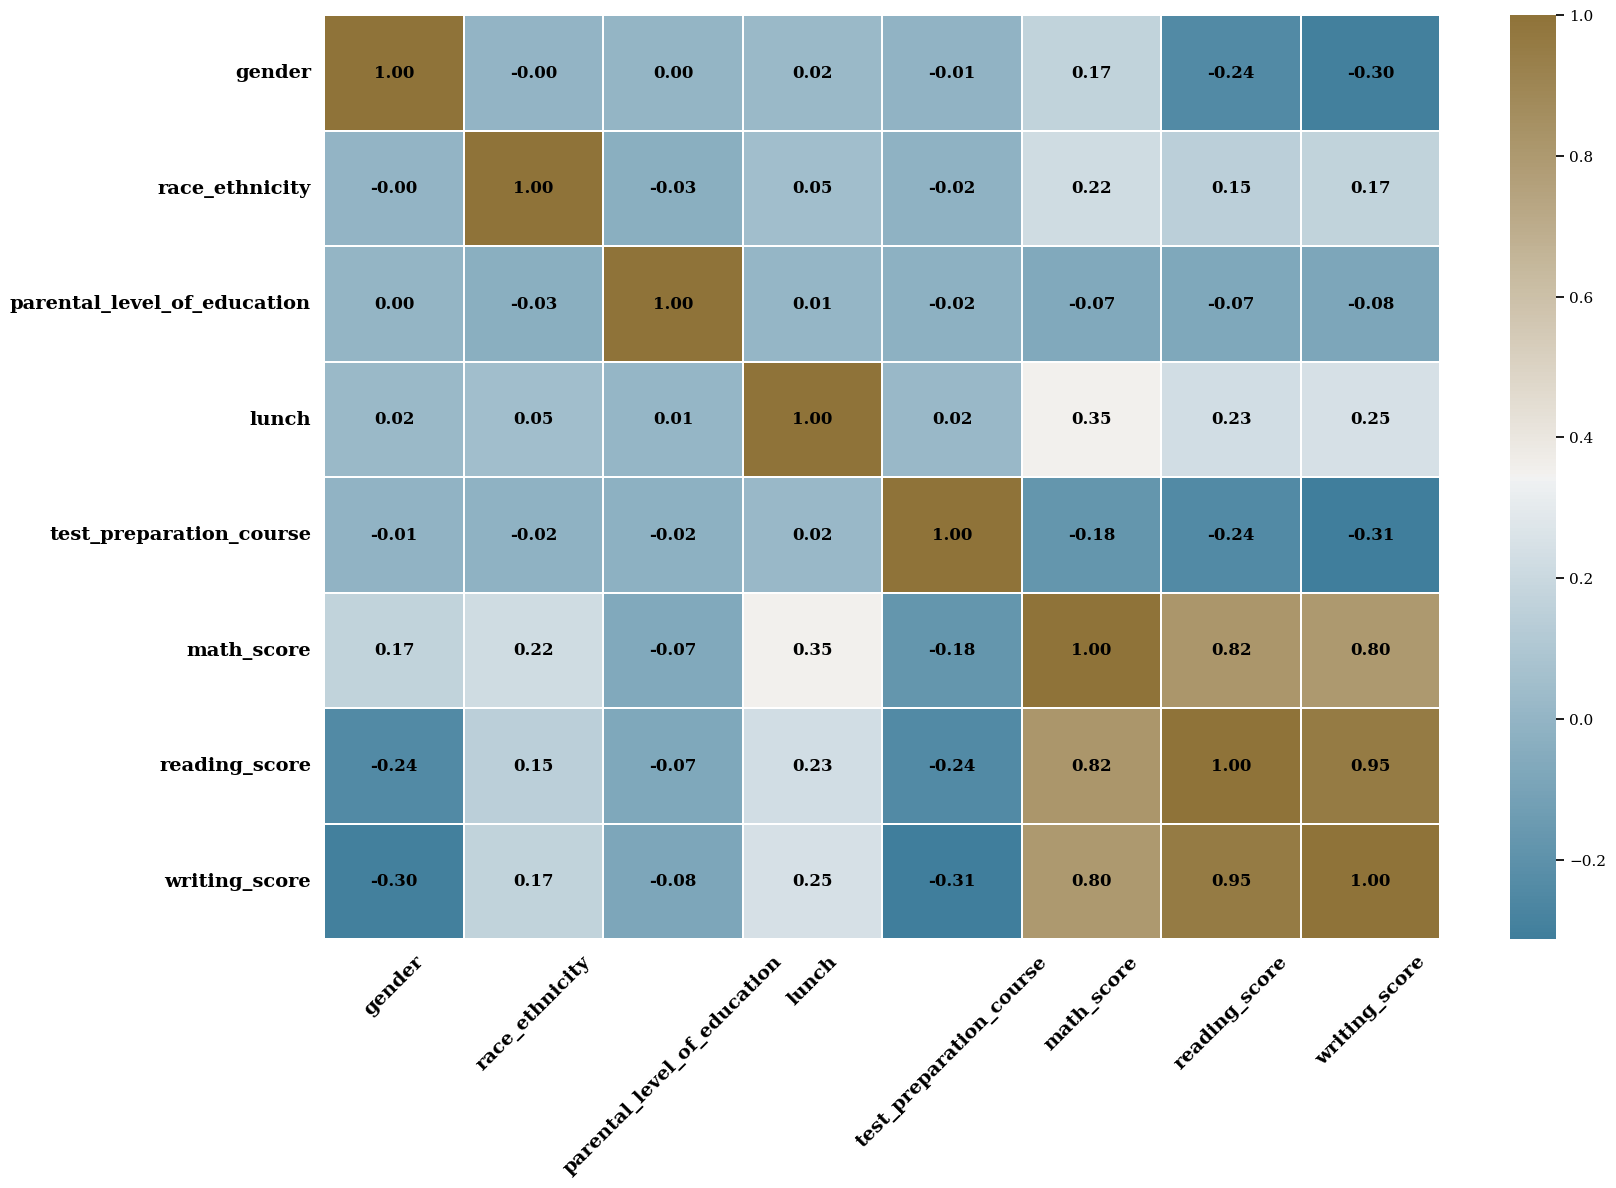

In [32]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()

#Univariate Analysis--------------------------------------------------------------------------------------------------

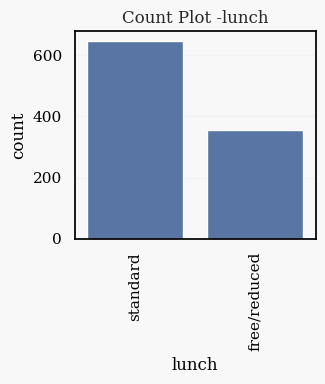

In [21]:
variable = 'lunch'

plt.figure(figsize = (6,4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat,order = df_cat['lunch'].value_counts().index)
plt.title(f'Count Plot -{variable}')
plt.xticks(rotation = 90)

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

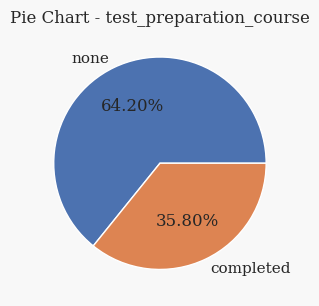

In [22]:
variable = 'test_preparation_course'

plt.figure(figsize = (6,4))
#Pie Chart
plt.subplot(1, 2, 1)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

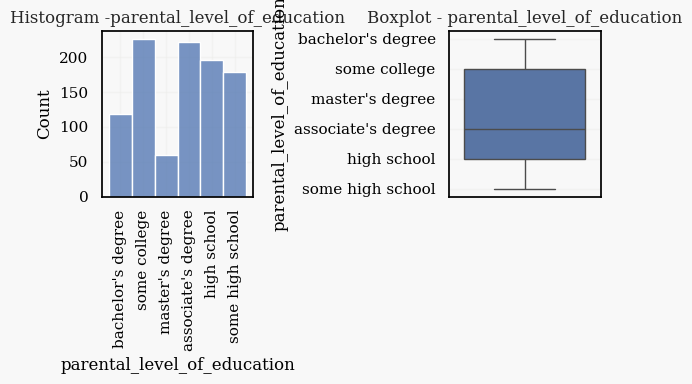

In [23]:
variable = 'parental_level_of_education'

plt.figure(figsize = (6,4))
#Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram -{variable}')
plt.xticks(rotation = 90)

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data=df)
plt.title(f'Boxplot - {variable}')

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#Bivariate Analysis--------------------------------------------------------------------------------------------------

In [25]:
plt.figure(figsize = (15,15))
ct_conversion_test_group = pd.crosstab(df['race_ethnicity'], df['test_preparation_course'],normalize ='index')
ct_conversion_test_group

test_preparation_course,completed,none
race_ethnicity,,
group A,0.348315,0.651685
group B,0.357895,0.642105
group C,0.366771,0.633229
group D,0.312977,0.687023
group E,0.428571,0.571429


<Figure size 1500x1500 with 0 Axes>

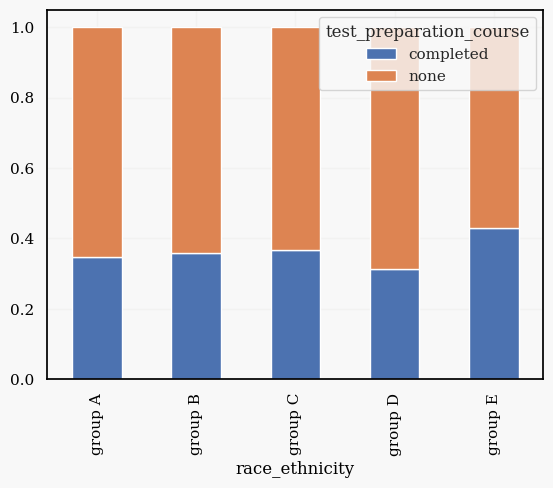

In [26]:
ct_conversion_test_group.plot.bar(stacked = True);

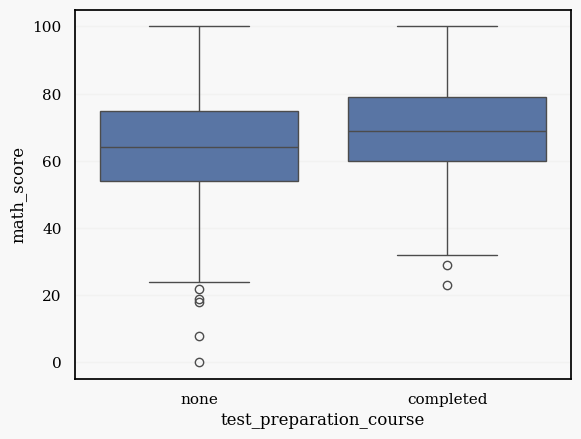

In [27]:
sns.boxplot(x = 'test_preparation_course', y = 'math_score', data = df);

Statistical Test

In [28]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'test_preparation_course':
        #Create a contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['test_preparation_course'])

        #perform chi_squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        #Display the results
        print(f"\nChi-squared test for {variable} vs. test_preparation_course:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        #check for significance
        if p < alpha:
            print(f"the differences in test_preparation_course across {variable} is statiscally significant.")
        else:
            print(f"the is no significant differences in test_preparation_course across {variable}.")


Chi-squared test for gender vs. test_preparation_course:
Chi-squared value: 0.015529201882465888
p-value: 0.9008273880804724
the is no significant differences in test_preparation_course across gender.

Chi-squared test for race_ethnicity vs. test_preparation_course:
Chi-squared value: 5.4875148857070695
p-value: 0.24082911295018397
the is no significant differences in test_preparation_course across race_ethnicity.

Chi-squared test for parental_level_of_education vs. test_preparation_course:
Chi-squared value: 9.54407054307069
p-value: 0.08923388625809343
the is no significant differences in test_preparation_course across parental_level_of_education.

Chi-squared test for lunch vs. test_preparation_course:
Chi-squared value: 0.22095439044844808
p-value: 0.6383136809999865
the is no significant differences in test_preparation_course across lunch.


In [29]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#step 1: check assumptions
#normality assumptions
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['test_preparation_course'] == 'completed']['math_score'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['test_preparation_course'] == 'none']['math_score'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#equality of variances
#levene_stat_true, levene_p_value_true = levene(df[df['lunch'] == 'completed']['math_score'])
#levene_stat_false, levene_p_value_false = levene(df[df['lunch'] == 'none']['math_score'])
#levene_stat = levene(df[df['test_preparation_course']]['math_score'])
#evene_p_value = levene(df[~df['test_preparation_course']]['math_score'])
#print(f"Levene's test for equality of variances : p-value = {levene_p_value}")
#print(f"Levene's test for equality of variances (True group): p-value = {levene_p_value_true}")
#print(f"Levene's test for equality of variances (False group): p-value = {levene_p_value_false}")

Shapiro-Wilk test for normality (True group): p-value = 0.1393494159012535
Shapiro-Wilk test for normality (False group): p-value = 0.0017542243871878584


In [30]:
#Step 2 perform a suitable test
alpha = 0.05

#if shapiro_p_value_true > alpha  and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #assumptions met - use t test for means
#    t_stat, t_p_value = ttest_ind(df[df['test_preparation_course']]['math_score'],df[~df['test_preparation_course']]['math_score'])
#    print(f"Independent 2-sample t-test: p-value = {t_p_value}")
#else:
#    #assumptions not met - use Mann-whitney U test for medians
#    u_stat, u_p_value = mannwhitneyu(df[df['test_preparation_course']]['math_score'],df[~df['test_preparation_course']]['math_score'])
#    print(f"Mann Whitney U test: p-value = {u_p_value}")

#Data Deep Exploration--------------------------------------------------------------------------------------------------

In [31]:
#Function for bar charts

def bar_charts(x, y, title):
    """
    Generate a bar chart using Plotly Express.

    Parameters:
    - x: Data for the x-axis (e.g., categories).
    - y: Data for the y-axis (e.g., corresponding values).
    - title: Title of the chart.

    Returns:
    - None
"""
    # Create a bar chart using Plotly Express
fig = px.bar(df,
        x= 'gender',  # Data for the x-axis
        y= 'parental_level_of_education',  # Data for the y-axis
        title='title',  # Title of the chart
        color='gender',  # Color the bars based on y-values
        labels={'x': 'Profession', 'y': 'Average Income'},  # Custom axis labels
        text='math_score',  # Add text labels to the bars
        orientation='h',
    )

#fig.show()
    # Customize the layout
fig.update_layout(
        paper_bgcolor='#111',  # Set the background color of the entire plot
        plot_bgcolor='#111',   # Set the background color of the plot area
        font_color='white',     # Set the font color
        font=dict(size=20)     # Set the font size
    )

fig.show()

    # Display the figure

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

C:\Users\alexr\AppData\Local\Temp\ipykernel_5664\2525242425.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\alexr\AppData\Local\Temp\ipykernel_5664\2525242425.py:31: UserWarning:


The palette list has fewer values (4) than needed (81) and will cycle, which may produce an uninterpretable plot.



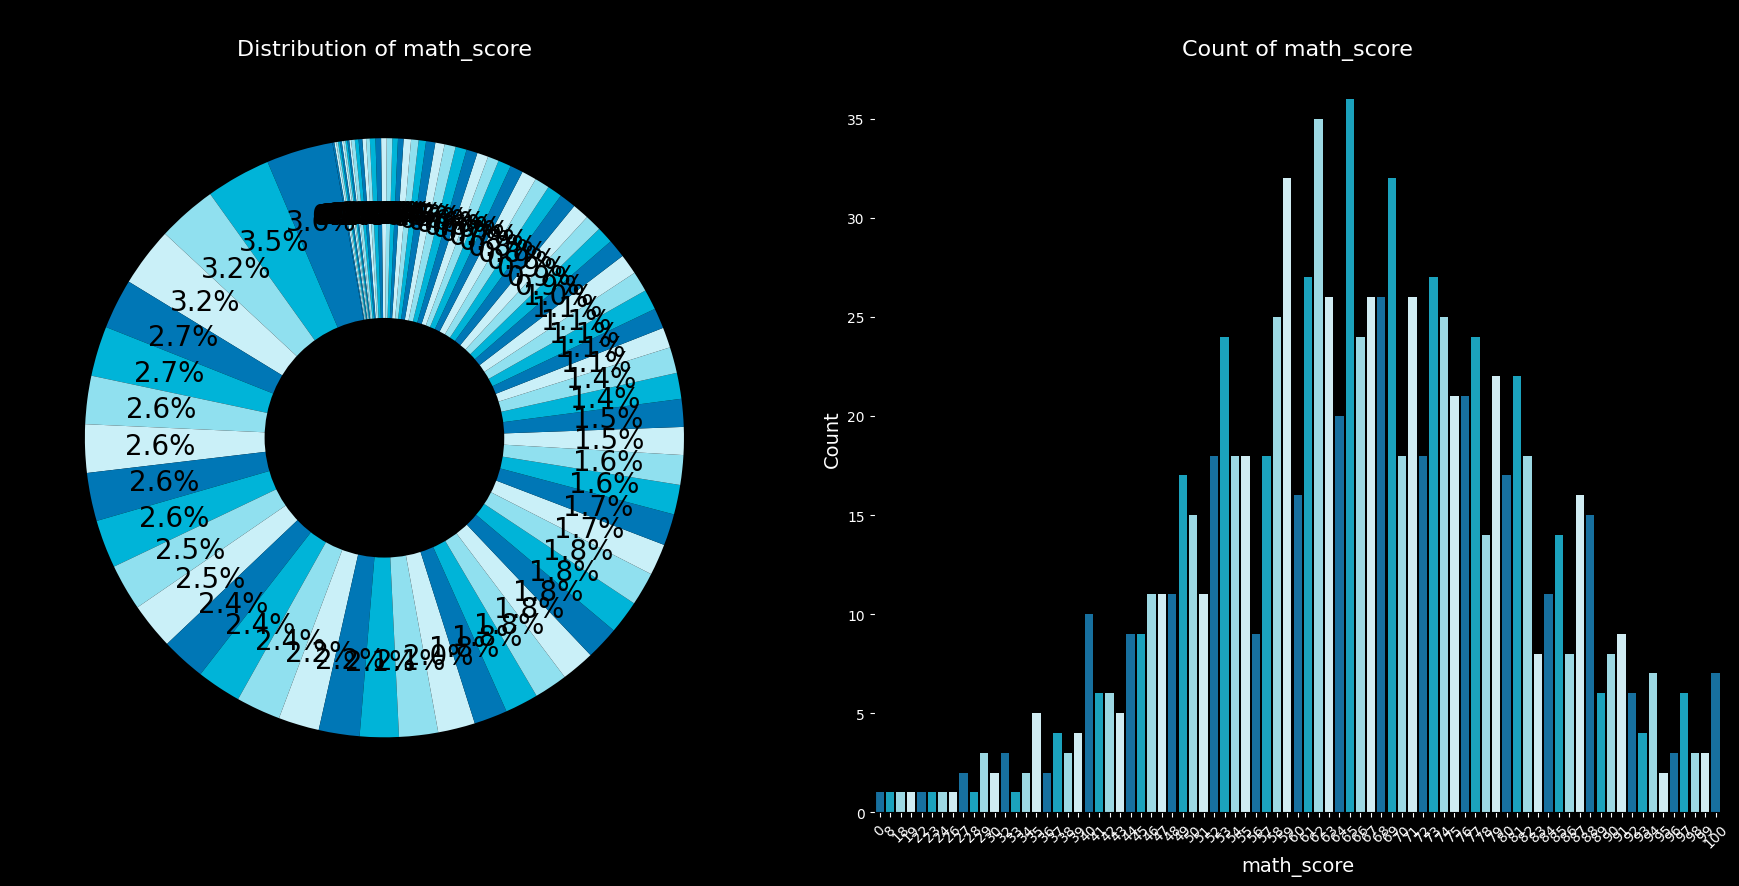

In [ ]:
#Function for Pie charts & Bar charts
def single_plot_distribution(column_name, dataframe, title):
    """
    Generate a pie chart and a bar chart to visualize the distribution of values in a single column.

    Parameters:
    - column_name: Name of the column to visualize.
    - dataframe: DataFrame containing the data.
    - title: Title of the plots.

    Returns:
    - None
"""
# Get the value counts of the specified column
value_counts = df['math_score'].value_counts()

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), facecolor='black') 

# Set main title for the figure
fig.suptitle('title')

# Pie chart
pie_colors = ['#0077b6', '#00b4d8', '#90e0ef', '#caf0f8']
ax1.pie(value_counts, autopct='%0.001f%%', startangle=100, textprops={'fontsize': 20}, pctdistance=0.75, colors=pie_colors, labels=None)
centre_circle = plt.Circle((0,0),0.40,fc='black')
ax1.add_artist(centre_circle)
ax1.set_title(f"Distribution of {'math_score'}", fontsize=16, color='white')

# Bar chart
sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=pie_colors) 
ax2.set_title(f"Count of {'math_score'}", fontsize=16, color='white')
ax2.set_xlabel('math_score', fontsize=14, color='white')
ax2.set_ylabel('Count', fontsize=14, color='white')

# Rotate x-axis labels for better readability
ax2.tick_params(axis='x', rotation=45, colors='white')
ax2.tick_params(axis='y', colors='white')

# Set background color for the subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
#Function for Sunburst
#def sun_brust(data, path, color_map, title):
"""
    Generate a sunburst chart using Plotly Express.

    Parameters:
    - data: DataFrame or array-like object containing the data.
    - path: List-like object specifying the hierarchical structure of the sunburst chart.
    - color_map: Dictionary mapping values to colors for coloring the segments.
    - title: Title of the chart.

    Returns:
    - None
    """
    # Create a sunburst chart using Plotly Express
fig = px.sunburst(
        df,  # Data for the chart
        path=['gender','parental_level_of_education'],  # Specifies the hierarchical structure
        color='gender',  # Color the segments based on the first element of the path
        color_discrete_map={"male": "RebeccaPurple", "female": "MediumPurple"}  # Map values to colors
    )

    # Customize the layout
fig.update_layout(
        title='title',  # Set the title of the chart
        paper_bgcolor='#111',  # Set the background color of the entire plot
        plot_bgcolor='#111',   # Set the background color of the plot area
        font_color='white',     # Set the font color
        font=dict(
            family='Comic Sans MS',  # Set the font family
            size=20,  # Set the font size
            color='white'  # Set the font color
        ),
        width=1000,  # Set the width of the plot
        height=600   # Set the height of the plot
    )

    # Update traces for markers and text
fig.update_traces(
        marker=dict(line=dict(color='white', width=2)),  # Set the marker color and width
        textfont=dict(size=15)  # Set the text font size
    )

    # Display the chart
fig.show()

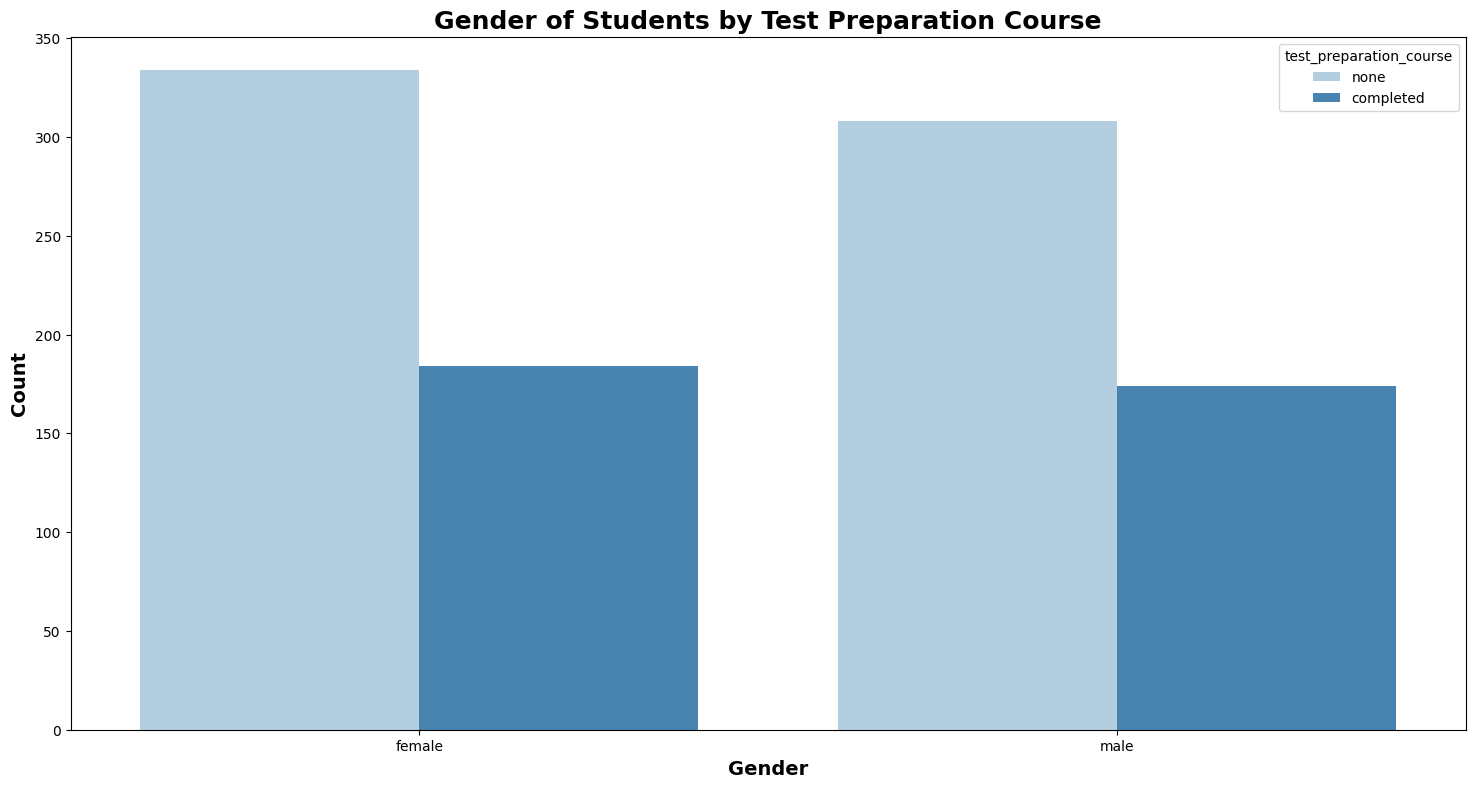

In [ ]:
#Gender of Students by Test Preparation Course
# Group the DataFrame by 'gender' and 'test_preparation_course', and count the occurrences
gn = df.groupby('gender')['test_preparation_course'].value_counts()

# Set up the figure for plotting
plt.figure(figsize=(18, 9))

# Create a count plot with seaborn, grouping by 'gender' and coloring by 'test_preparation_course'
sns.countplot(x='gender', hue='test_preparation_course', data=df, palette='Blues')

# Set the title of the plot
plt.title('Gender of Students by Test Preparation Course', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Gender', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

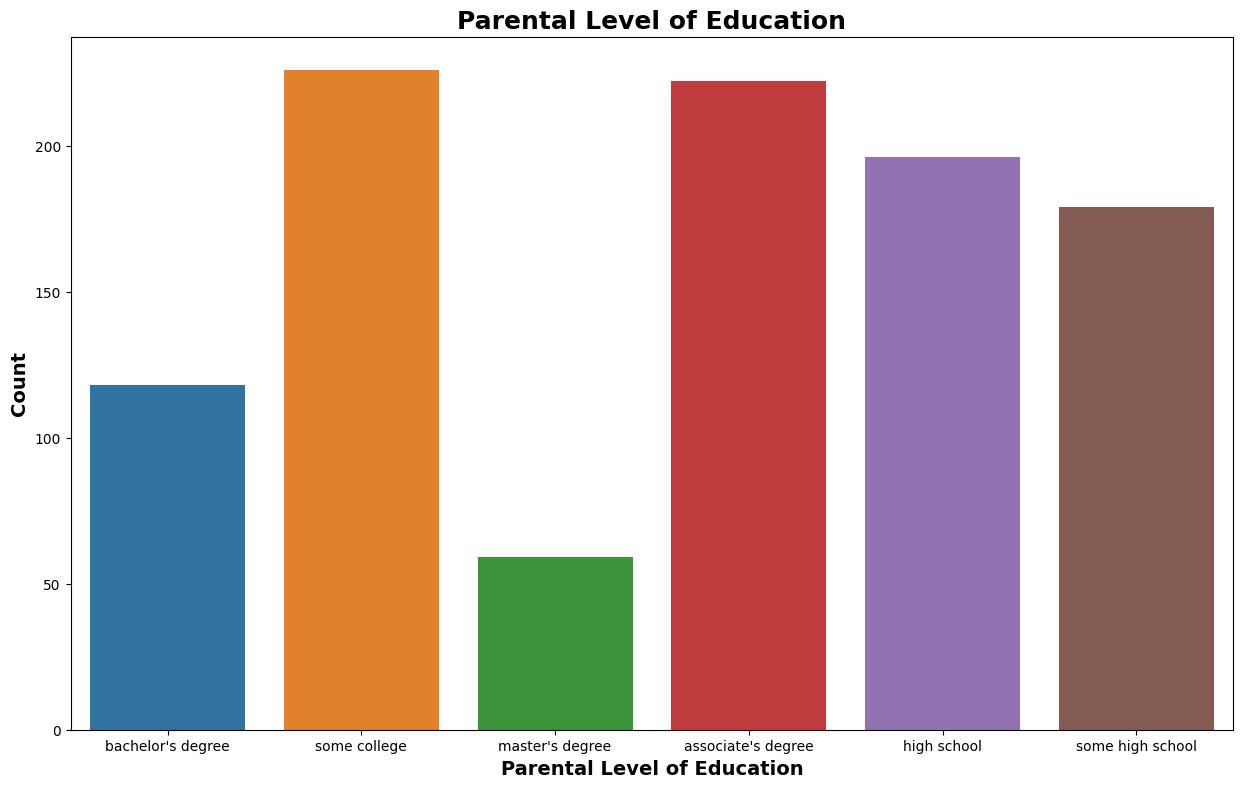

In [ ]:
# Set up the figure for plotting
plt.figure(figsize=(15, 9))

# Create a count plot with seaborn, specifying the DataFrame (df), x-axis (parental_level_of_education), and hue (parental_level_of_education)
sns.countplot(data=df, x='parental_level_of_education', hue='parental_level_of_education')

# Set the title of the plot
plt.title('Parental Level of Education', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Parental Level of Education', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

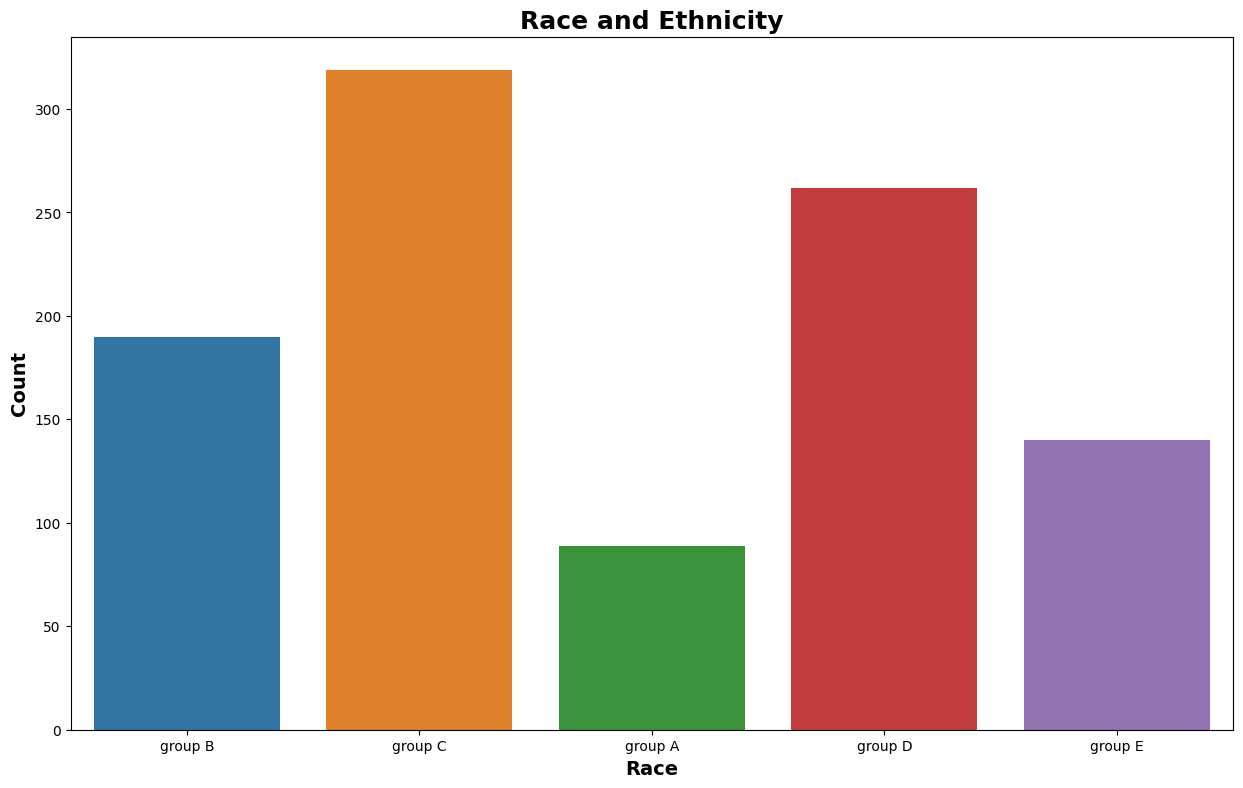

In [ ]:
# Set up the figure for plotting
plt.figure(figsize=(15, 9))

# Create a count plot with seaborn, specifying the DataFrame (df), x-axis (race_ethnicity), and hue (race_ethnicity)
sns.countplot(data=df, x='race_ethnicity', hue='race_ethnicity')

# Set the title of the plot
plt.title('Race and Ethnicity', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Race', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

In [ ]:
label = "math_score"

y = df['math_score']
X = df[['writing_score','reading_score']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             math_score   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          2.918e+04
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:24:42   Log-Likelihood:                         -3592.7
No. Observations:                1000   AIC:                                      7189.
Df Residuals:                     998   BIC:                                      7199.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------